In [1]:
import os 
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

In [2]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
#Importing Configs
# Define the path where config.py is located
#Mac
os.chdir('/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling')
#Linux
#os.chdir('/home/kwnabors/Documents/GitHub/Finance-ML-Modeling')
config_file_path = os.getcwd()
print(config_file_path)

# Add this path to the sys.path
sys.path.append(config_file_path)

import config

#Configs
database_file = config.database
database_folder = config.database_folder
bert_models = config.bert_models
bert_models_local = config.bert_models_local
Sentiment_models = config.Sentiment_models
finbert_models = config.finbert_models
database = config.Local_Database

Body = config.Body
Model = config.Model
Model_Subfolder = f'/{Body} Texts/{Model}'
#Model_Folder = config.texts
# Model_Folder = config.Sentiment_models
# Model_Folder = Model_Folder + Model_Subfolder
Model_Folder = config.Sentiment_models

Body_2 = config.Body_2
Model_2 = config.Model_2
Model_Subfolder_2 = f'/{Body_2} Texts/{Model_2}'
Model_Folder_2 = config.texts
Model_Folder_2 = Model_Folder_2 + Model_Subfolder_2


/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling
/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling
/Users/kylenabors/Documents
/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling


In [4]:
df1 = pd.read_csv(f"{finbert_models}/{Body}/{Model}/{Body}_{Model}_finbert_model_short.csv")
df2 = pd.read_csv(f"{finbert_models}/{Body}/{Model}/{Body}_{Model}_finbert_model_short_2.csv")

df1 = df1[['date', 'sentiment']]

df1 = df1.groupby(['date']).mean().reset_index()

In [5]:
# Fed_list = ["Speeches","Minutes", "Beige Book"]
# ECB_list = ["Speeches", "Monetary policy decisions", "Economic Bulletin"]

# df1 = pd.DataFrame()
# for i in Fed_list:
#     Body = "Fed"
#     Model = i
#     Model_Subfolder = f'/{Body} Texts/{Model}'
#     Model_Folder = config.Sentiment_models
#     dft = pd.read_csv(f"{finbert_models}/{Body}/{Model}/{Body}_{Model}_finbert_model_short.csv")
    
#     dft = dft[['date', 'sentiment']]
#     df1 = pd.concat([df1, dft])
    

# df1 = df1.groupby(['date']).mean().reset_index()

In [6]:
ffr = pd.read_csv('/Users/kylenabors/Documents/Database/Other Data/FFRF/FFRF.csv')
#Convert Date to datetime period days 
ffr['Date'] = pd.to_datetime(ffr['Date'])
ffr = ffr[['Date', 'Price', 'Vol.']]
#Rename Pirce to ffr_price and Vol. to ffr_vol
ffr = ffr.rename(columns={'Price': 'ffr_price', 'Vol.': 'ffr_vol'})
#on ffr_vol remove the k at the end of the number and convert to float
ffr['ffr_vol'] = ffr['ffr_vol'].str.replace('K', '')
ffr['ffr_vol'] = ffr['ffr_vol'].astype(float)
ffr['ffr_vol'] = ffr['ffr_vol'] * 1000

print(ffr.head())

tb10y = pd.read_csv('/Users/kylenabors/Documents/Database/Other Data/10Y Treasury/T10YFF.csv')

tb10y['DATE'] = pd.to_datetime(tb10y['DATE'])
tb10y = tb10y.rename(columns={'T10YFF': 'tb10y'})

tb10y = tb10y[tb10y['tb10y'] != '.']
print(tb10y.head())

ir1 = pd.read_csv(f"{database}/Other Data/2YIR.csv")
ir1 = ir1.rename(columns={'DATE': 'date', 'DGS2': 'IR2'})
ir1['date'] = pd.to_datetime(ir1['date'])
ir1 = ir1[ir1['IR2'] != '.']

        Date  ffr_price    ffr_vol
0 2019-11-14    98.4400 18080.0000
1 2019-11-13    98.4400 48770.0000
2 2019-11-12    98.4300 27110.0000
3 2019-11-11    98.4300  2380.0000
4 2019-11-08    98.4300 32870.0000
        DATE tb10y
0 1962-01-02  1.31
1 1962-01-03  1.53
2 1962-01-04  1.24
3 1962-01-05  1.52
4 1962-01-08  2.03


In [7]:
#Convert date to datetime
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.merge(ffr, how='left', left_on='date', right_on='Date')
df1 = df1.drop(columns=['Date'])

df1 = df1.merge(tb10y, how='left', left_on='date', right_on='DATE')
df1 = df1.drop(columns=['DATE'])

df1 = df1.merge(ir1, how='left', left_on='date', right_on='date')

#Convert tb10y and IR2 to float
df1['tb10y'] = df1['tb10y'].astype(float)
df1['IR2'] = df1['IR2'].astype(float)

print(df1.dtypes)
#df1 = df1.dropna()
print(df1.head(-10))   


date         datetime64[ns]
sentiment           float64
ffr_price           float64
ffr_vol             float64
tb10y               float64
IR2                 float64
dtype: object
          date  sentiment  ffr_price    ffr_vol   tb10y    IR2
0   1998-07-01    -0.0671        NaN        NaN -0.9100 5.4600
1   1998-08-18    -0.0581        NaN        NaN -0.1300 5.3600
2   1998-09-29    -0.1062        NaN        NaN -0.8500 4.4700
3   1998-11-17    -0.1330        NaN        NaN  0.2600 4.5800
4   1998-12-22     0.0139        NaN        NaN  0.0700 4.5900
..         ...        ...        ...        ...     ...    ...
185 2021-07-28     0.0627    99.9000  3140.0000  1.1600 0.2000
186 2021-09-22     0.0594    99.9200   520.0000  1.2400 0.2500
187 2021-11-03     0.0920    99.9200 22880.0000  1.5200 0.4700
188 2021-12-15     0.0728    99.9200 14220.0000  1.3900 0.6900
189 2022-01-26     0.0615    99.9200 13280.0000  1.7700 1.1300

[190 rows x 6 columns]


In [8]:
df_temp = pd.read_csv(f"/Users/kylenabors/Documents/Database/Other Data/SPY/SPYs.csv")

In [9]:
spy = df_temp.copy(deep=True)
spy = spy[['DATE', 'CRSPTM1', 'TIME']]
spy = spy.rename(columns={'DATE': 'date', 'CRSPTM1': 'spy_price', 'TIME': 'time'})
spy['date2'] = spy['date'].copy(deep=True)
spy["date"] = spy["date"] + " " + spy["time"]
spy["date"] = pd.to_datetime(spy["date"])
spy["date2"] = pd.to_datetime(spy["date2"])
print(spy.head()) 
print(spy.dtypes)

                 date  spy_price     time      date2
0 2011-04-01 09:30:00  1000.0000  9:30:00 2011-04-01
1 2011-04-01 09:30:01  1001.4000  9:30:01 2011-04-01
2 2011-04-01 09:30:02  1001.7200  9:30:02 2011-04-01
3 2011-04-01 09:30:03  1001.9200  9:30:03 2011-04-01
4 2011-04-01 09:30:04  1001.9900  9:30:04 2011-04-01
date         datetime64[ns]
spy_price           float64
time                 object
date2        datetime64[ns]
dtype: object


In [10]:
spy = spy.merge(df1, how='left', left_on='date2', right_on='date')
spy = spy.drop(columns=['date_y'])
spy = spy.rename(columns={'date_x': 'date'})
spy = spy[['date', 'spy_price', 'sentiment', 'time']]
spy = spy.dropna()
print(spy.head())

spy["positive"] = np.where(spy["sentiment"] > 0, 1, 0)
spy["negative"] = np.where(spy["sentiment"] < 0, 1, 0)

                      date  spy_price  sentiment     time
397817 2011-04-27 09:30:00  1016.5400    -0.0119  9:30:00
397818 2011-04-27 09:30:01  1017.0400    -0.0119  9:30:01
397819 2011-04-27 09:30:02  1017.0300    -0.0119  9:30:02
397820 2011-04-27 09:30:03  1017.0700    -0.0119  9:30:03
397821 2011-04-27 09:30:04  1017.1400    -0.0119  9:30:04


In [20]:
spy_pos = spy[spy["positive"] == 1]
spy_neg = spy[spy["negative"] == 1]

print(len(spy_pos))
print(len(spy_neg))

print(spy_pos.head())

819035
1404060
                       date  spy_price  sentiment     time  positive  negative
5558638 2012-03-13 09:30:00  1022.9800     0.0638  9:30:00         1         0
5558639 2012-03-13 09:30:01  1024.8700     0.0638  9:30:01         1         0
5558640 2012-03-13 09:30:02  1025.3200     0.0638  9:30:02         1         0
5558641 2012-03-13 09:30:03  1025.4600     0.0638  9:30:03         1         0
5558642 2012-03-13 09:30:04  1025.5800     0.0638  9:30:04         1         0


       time      mean         var
            spy_price   spy_price
0  10:00:00 1913.3103 508461.1534
1  10:00:01 1913.3413 508495.1824
2  10:00:02 1913.3203 508420.8216
3  10:00:03 1913.3010 508365.0779
4  10:00:04 1913.2770 508292.4408
                     time  mean_spy_price  var_spy_price  sd_spy_price
21601 1900-01-01 09:30:00       1909.2506    505506.9727      710.9901
21602 1900-01-01 09:30:01       1910.3723    505858.2564      711.2371
21603 1900-01-01 09:30:02       1910.5757    505994.4282      711.3329
21604 1900-01-01 09:30:03       1910.9184    506553.2782      711.7256
21605 1900-01-01 09:30:04       1911.0769    506758.4521      711.8697


<Axes: xlabel='time'>

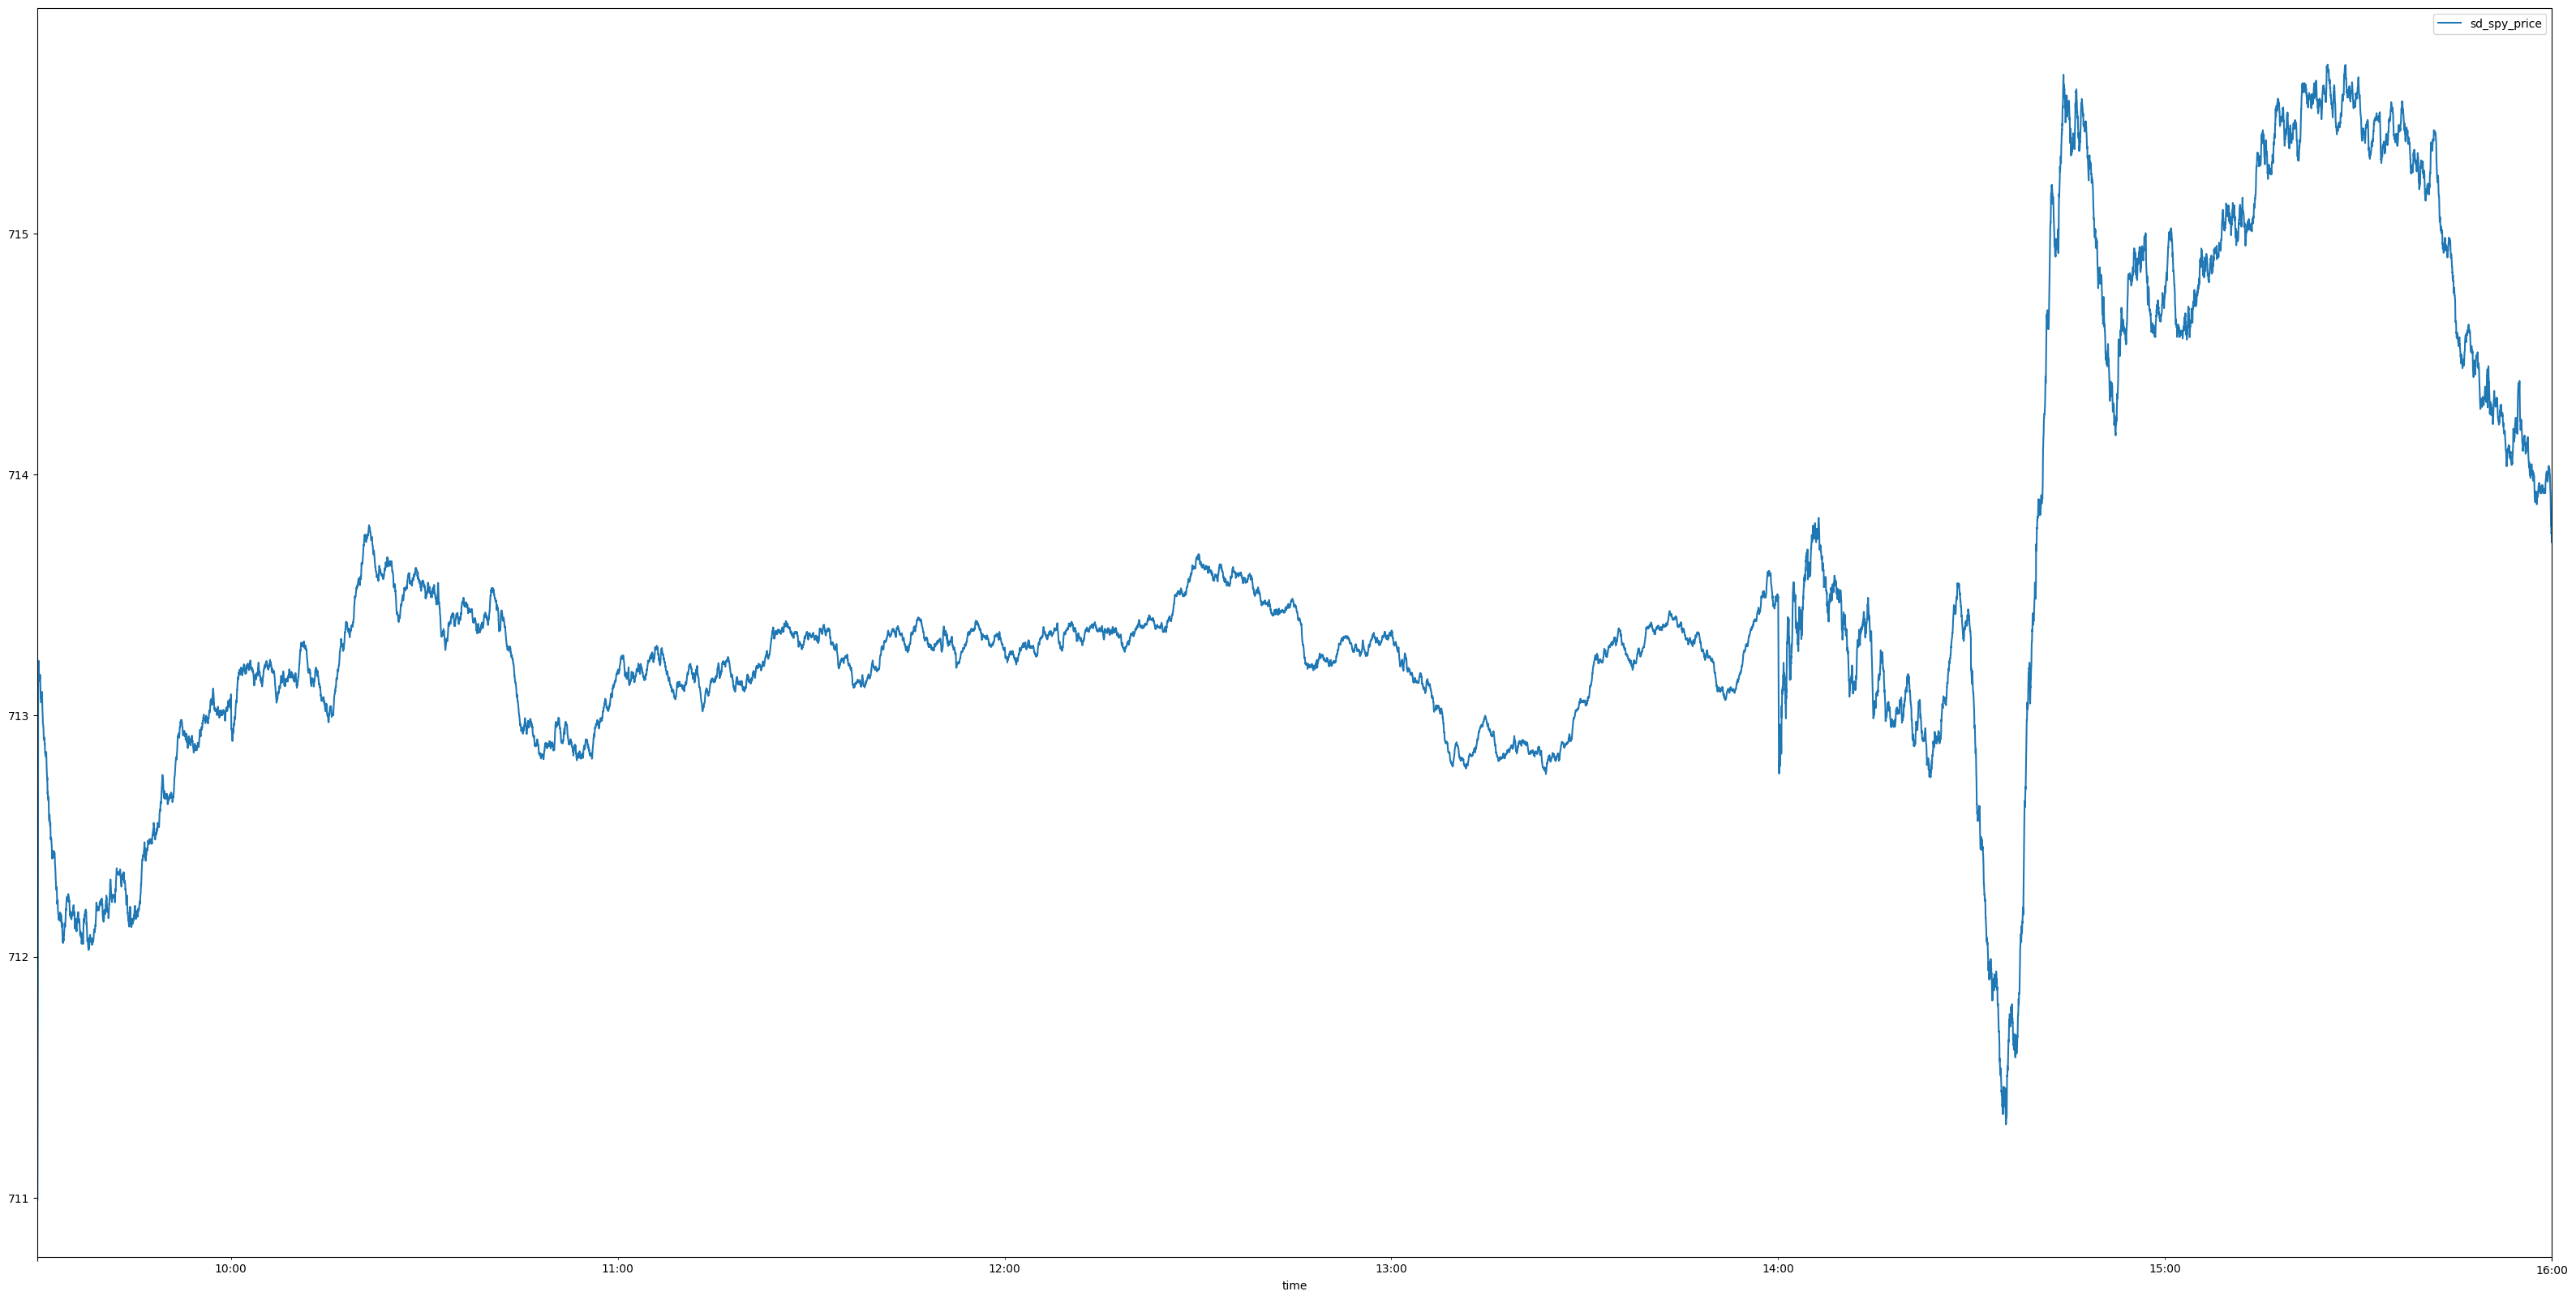

In [23]:
pivot = pd.pivot_table(spy, values='spy_price', index=['time'], aggfunc=["mean", "var"]).reset_index()
print(pivot.head())
pivot.columns = ['_'.join(col).strip() for col in pivot.columns.values]
pivot = pivot.rename(columns={'time_': 'time'})
pivot['time'] = pd.to_datetime(pivot['time'], format='%H:%M:%S')
pivot['sd_spy_price'] = pivot['var_spy_price'].astype(float)**0.5

#Sort pivot by time
pivot = pivot.sort_values(by=['time'])
print(pivot.head())

pivot.plot(x='time', y='sd_spy_price', kind='line', figsize=(40, 20))




       time      mean         var
            spy_price   spy_price
0  10:00:00 2172.0134 571784.6344
1  10:00:01 2172.0363 571857.0806
2  10:00:02 2172.0206 571840.1428
3  10:00:03 2171.9897 571781.5737
4  10:00:04 2171.9557 571716.2452
                     time  mean_spy_price  var_spy_price  sd_spy_price
21601 1900-01-01 09:30:00       2169.2114    568030.9782      753.6783
21602 1900-01-01 09:30:01       2169.9274    568464.2527      753.9657
21603 1900-01-01 09:30:02       2169.9791    568465.9085      753.9668
21604 1900-01-01 09:30:03       2170.3394    569122.6545      754.4022
21605 1900-01-01 09:30:04       2170.2274    569072.6037      754.3690


<Axes: xlabel='time'>

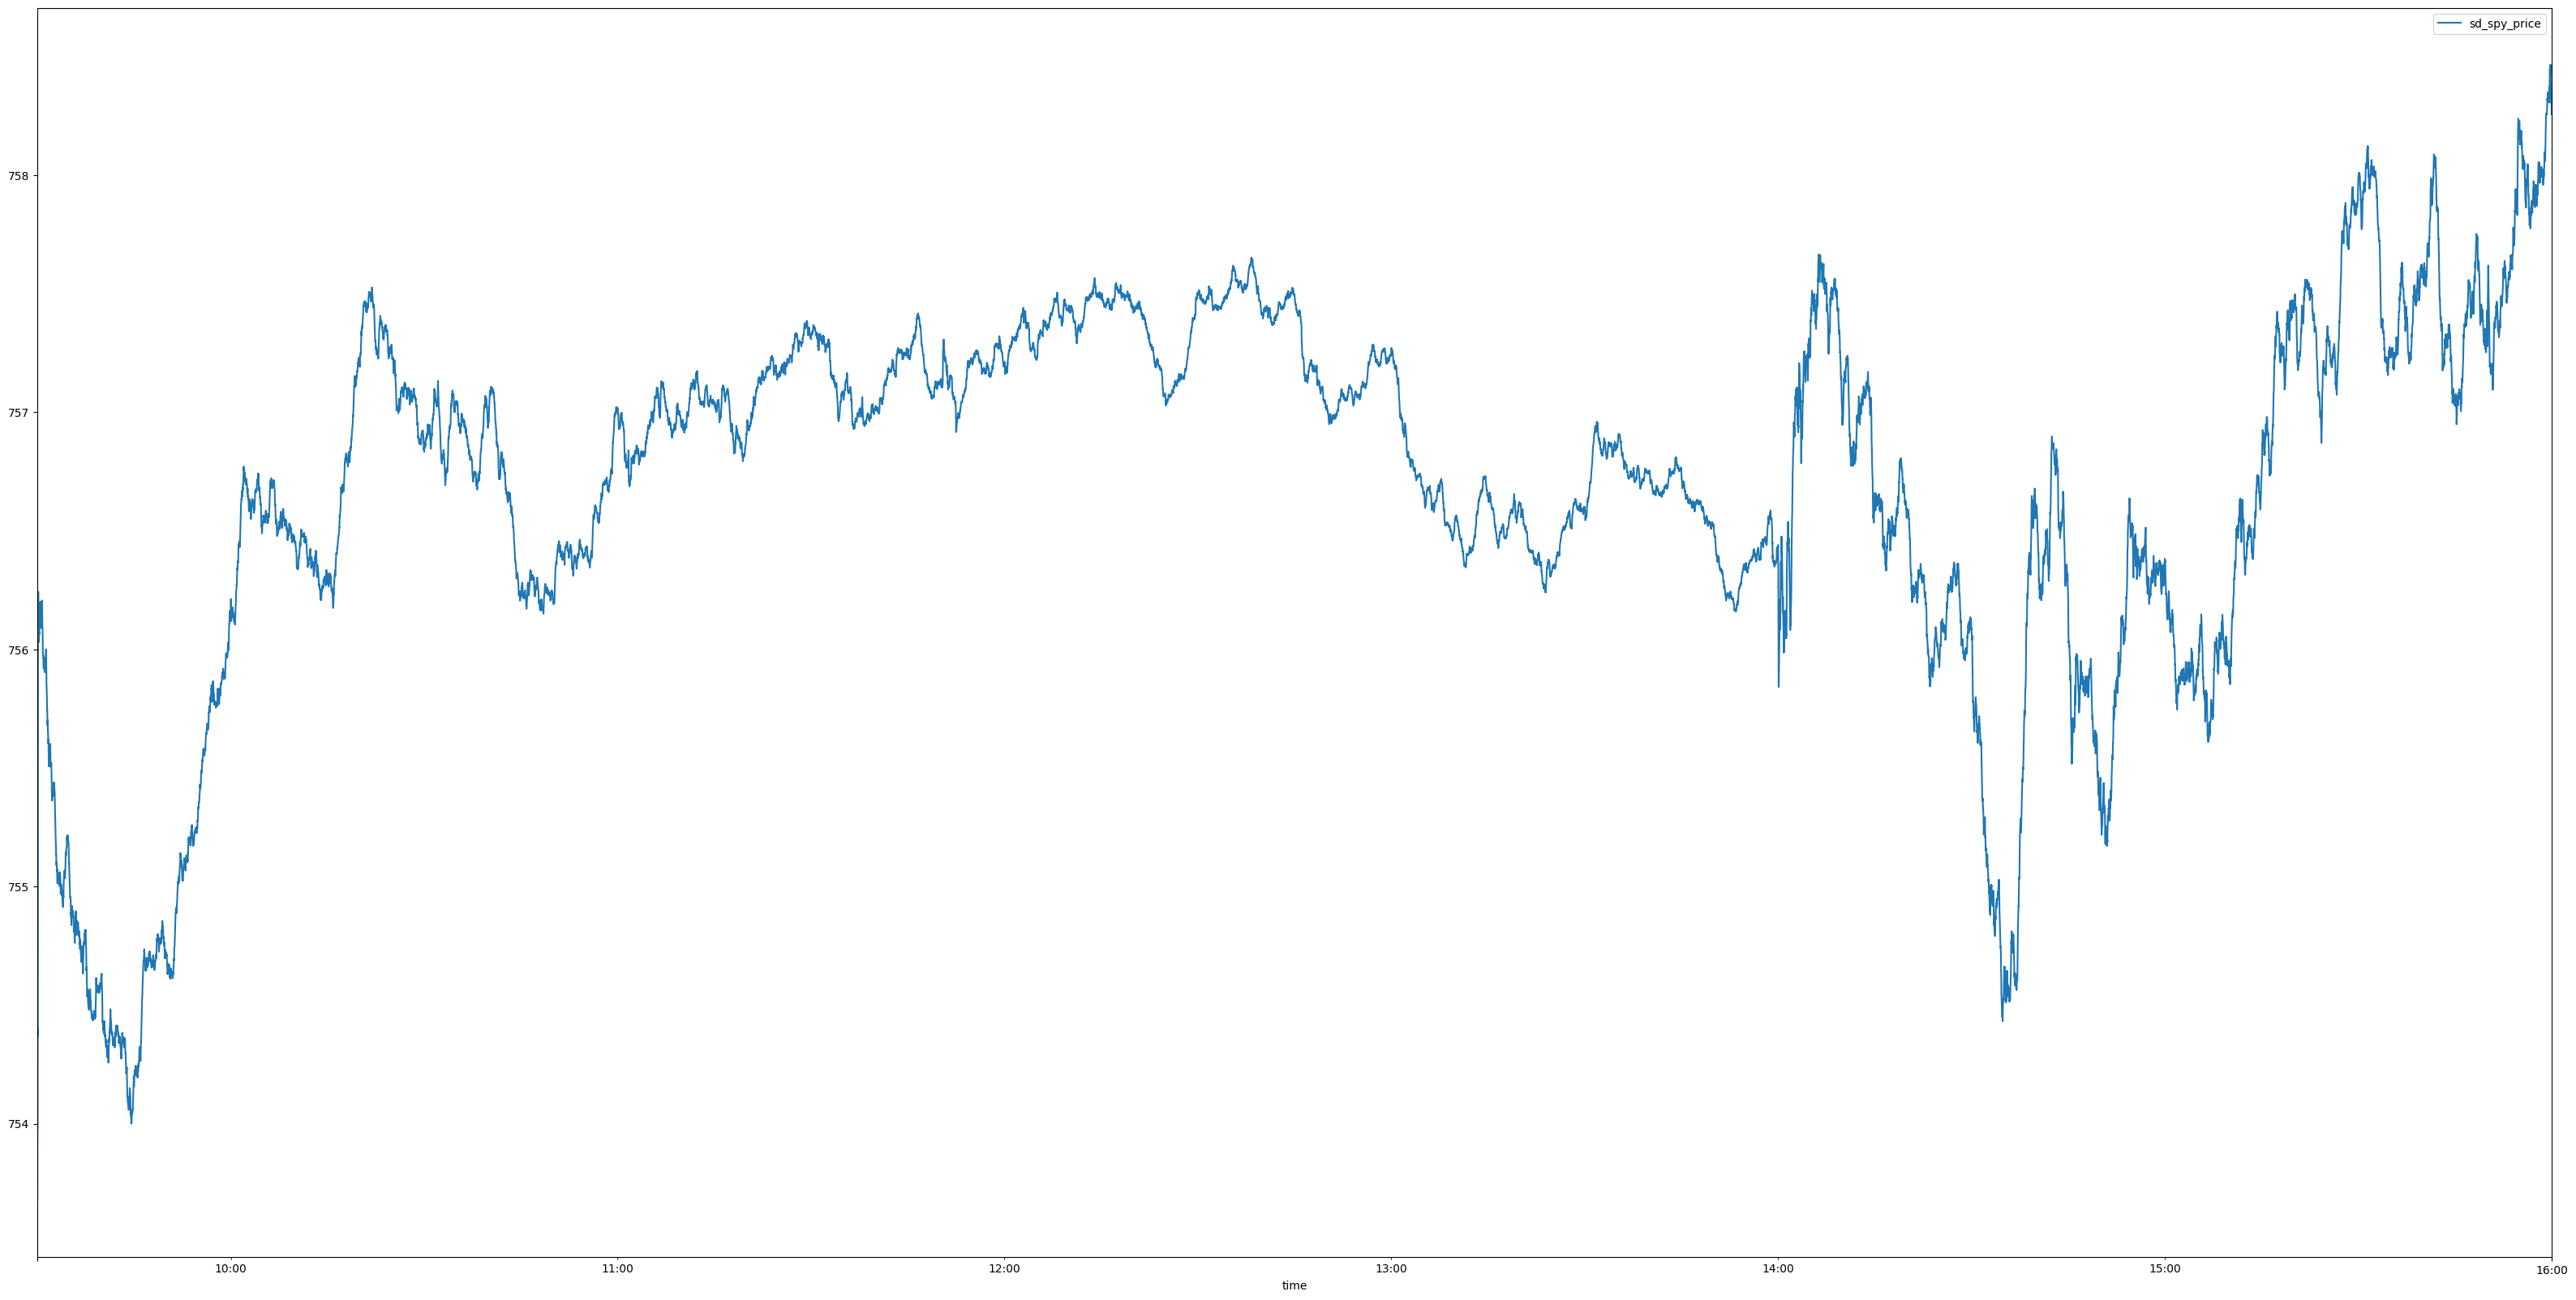

In [17]:
pivot = pd.pivot_table(spy_pos, values='spy_price', index=['time'], aggfunc=["mean", "var"]).reset_index()
print(pivot.head())
pivot.columns = ['_'.join(col).strip() for col in pivot.columns.values]
pivot = pivot.rename(columns={'time_': 'time'})
pivot['time'] = pd.to_datetime(pivot['time'], format='%H:%M:%S')
pivot['sd_spy_price'] = pivot['var_spy_price'].astype(float)**0.5

#Sort pivot by time
pivot = pivot.sort_values(by=['time'])
print(pivot.head())
pivot.plot(x='time', y='sd_spy_price', kind='line', figsize=(40, 20))

       time      mean         var
            spy_price   spy_price
0  10:00:00 1751.0852 414927.9959
1  10:00:01 1751.1172 414938.8282
2  10:00:02 1751.0913 414823.0829
3  10:00:03 1751.0753 414766.8940
4  10:00:04 1751.0525 414684.7250
                     time  mean_spy_price  var_spy_price  sd_spy_price
21601 1900-01-01 09:30:00       1747.0080    412899.2566      642.5724
21602 1900-01-01 09:30:01       1748.2558    413238.2064      642.8361
21603 1900-01-01 09:30:02       1748.5253    413495.6381      643.0363
21604 1900-01-01 09:30:03       1748.8347    413970.2929      643.4052
21605 1900-01-01 09:30:04       1749.1063    414391.4491      643.7324


<Axes: xlabel='time'>

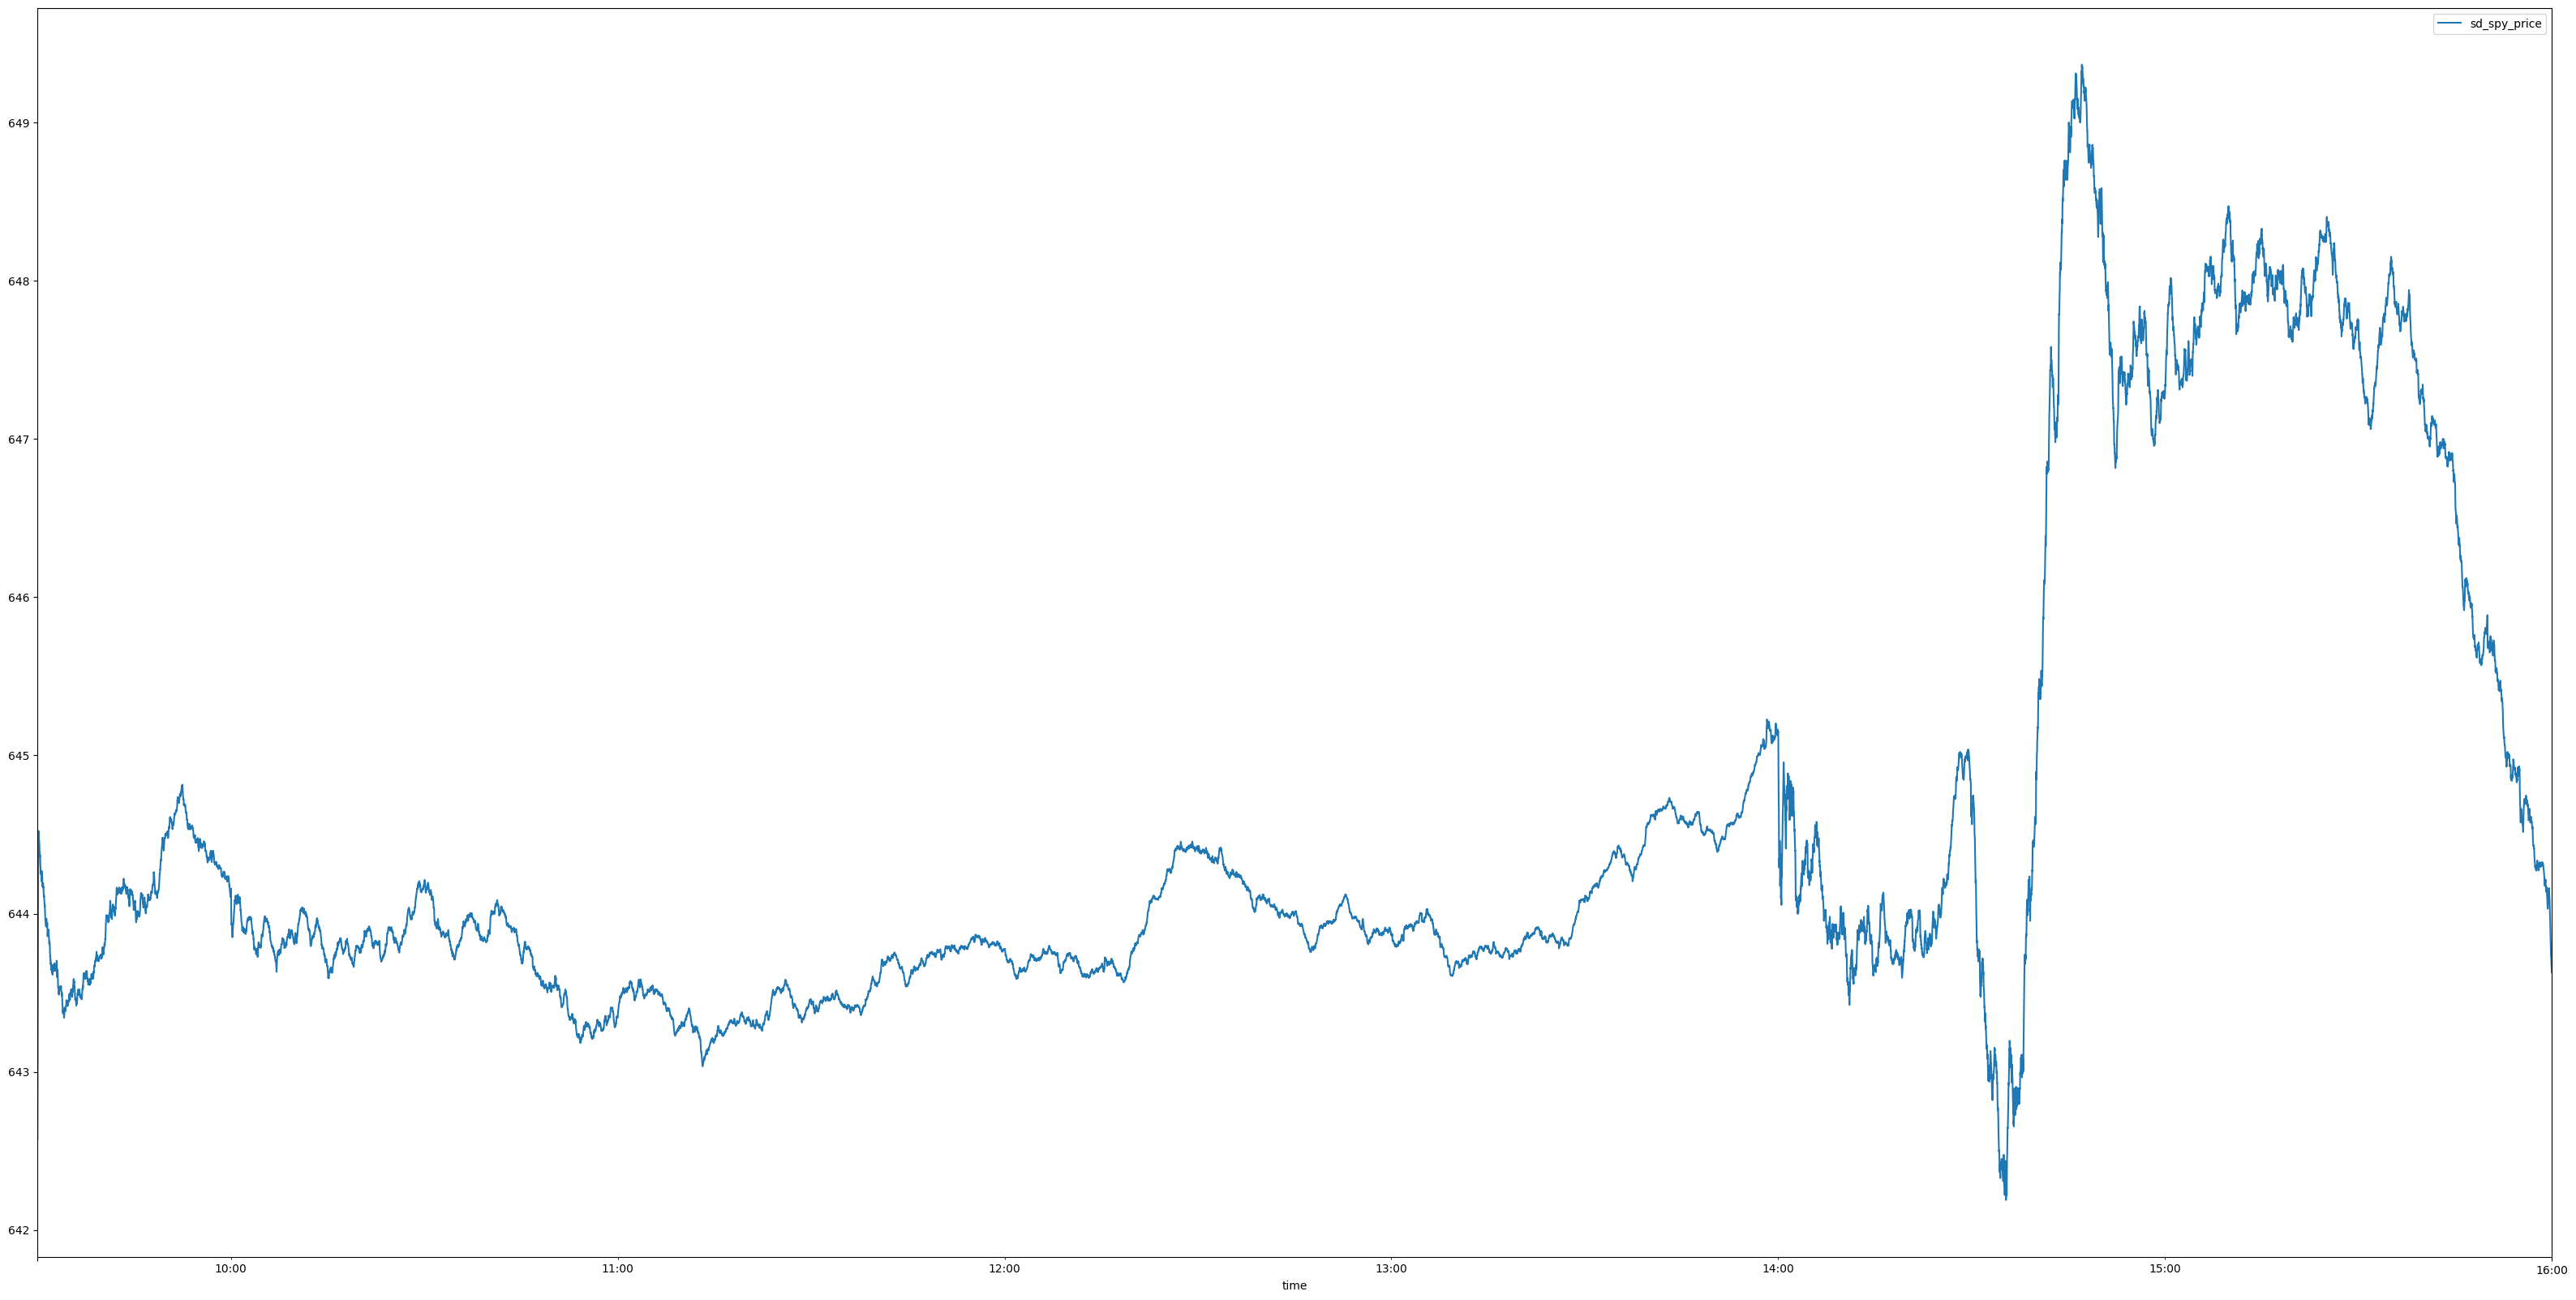

In [18]:
pivot = pd.pivot_table(spy_neg, values='spy_price', index=['time'], aggfunc=["mean", "var"]).reset_index()
print(pivot.head())
pivot.columns = ['_'.join(col).strip() for col in pivot.columns.values]
pivot = pivot.rename(columns={'time_': 'time'})
pivot['time'] = pd.to_datetime(pivot['time'], format='%H:%M:%S')
pivot['sd_spy_price'] = pivot['var_spy_price'].astype(float)**0.5
#Sort pivot by time
pivot = pivot.sort_values(by=['time'])
print(pivot.head())
pivot.plot(x='time', y='sd_spy_price', kind='line', figsize=(40, 20))

In [14]:
spy_pos = spy_pos[['date', 'spy_price', 'time']]

spy_pos = spy_pos.set_index('date')

spy_pos = spy_pos.resample('5min').agg(["mean", "var"]).reset_index()
spy_pos.columns = ['_'.join(col).strip() for col in spy_pos.columns.values]
spy_pos = spy_pos.rename(columns={'date_': 'date', 'spy_price_mean': 'spy_price', 'spy_price_var': 'spy_price_var'})
spy_pos['spy_price_sd'] = spy_pos['spy_price_var'] ** 0.5
spy_pos = spy_pos.drop(columns=['spy_price_var'])
print(spy_pos.head())


TypeError: Could not convert 9:30:009:30:019:30:029:30:039:30:049:30:059:30:069:30:079:30:089:30:099:30:109:30:119:30:129:30:139:30:149:30:159:30:169:30:179:30:189:30:199:30:209:30:219:30:229:30:239:30:249:30:259:30:269:30:279:30:289:30:299:30:309:30:319:30:329:30:339:30:349:30:359:30:369:30:379:30:389:30:399:30:409:30:419:30:429:30:439:30:449:30:459:30:469:30:479:30:489:30:499:30:509:30:519:30:529:30:539:30:549:30:559:30:569:30:579:30:589:30:599:31:009:31:019:31:029:31:039:31:049:31:059:31:069:31:079:31:089:31:099:31:109:31:119:31:129:31:139:31:149:31:159:31:169:31:179:31:189:31:199:31:209:31:219:31:229:31:239:31:249:31:259:31:269:31:279:31:289:31:299:31:309:31:319:31:329:31:339:31:349:31:359:31:369:31:379:31:389:31:399:31:409:31:419:31:429:31:439:31:449:31:459:31:469:31:479:31:489:31:499:31:509:31:519:31:529:31:539:31:549:31:559:31:569:31:579:31:589:31:599:32:009:32:019:32:029:32:039:32:049:32:059:32:069:32:079:32:089:32:099:32:109:32:119:32:129:32:139:32:149:32:159:32:169:32:179:32:189:32:199:32:209:32:219:32:229:32:239:32:249:32:259:32:269:32:279:32:289:32:299:32:309:32:319:32:329:32:339:32:349:32:359:32:369:32:379:32:389:32:399:32:409:32:419:32:429:32:439:32:449:32:459:32:469:32:479:32:489:32:499:32:509:32:519:32:529:32:539:32:549:32:559:32:569:32:579:32:589:32:599:33:009:33:019:33:029:33:039:33:049:33:059:33:069:33:079:33:089:33:099:33:109:33:119:33:129:33:139:33:149:33:159:33:169:33:179:33:189:33:199:33:209:33:219:33:229:33:239:33:249:33:259:33:269:33:279:33:289:33:299:33:309:33:319:33:329:33:339:33:349:33:359:33:369:33:379:33:389:33:399:33:409:33:419:33:429:33:439:33:449:33:459:33:469:33:479:33:489:33:499:33:509:33:519:33:529:33:539:33:549:33:559:33:569:33:579:33:589:33:599:34:009:34:019:34:029:34:039:34:049:34:059:34:069:34:079:34:089:34:099:34:109:34:119:34:129:34:139:34:149:34:159:34:169:34:179:34:189:34:199:34:209:34:219:34:229:34:239:34:249:34:259:34:269:34:279:34:289:34:299:34:309:34:319:34:329:34:339:34:349:34:359:34:369:34:379:34:389:34:399:34:409:34:419:34:429:34:439:34:449:34:459:34:469:34:479:34:489:34:499:34:509:34:519:34:529:34:539:34:549:34:559:34:569:34:579:34:589:34:59 to numeric

<Axes: xlabel='date'>

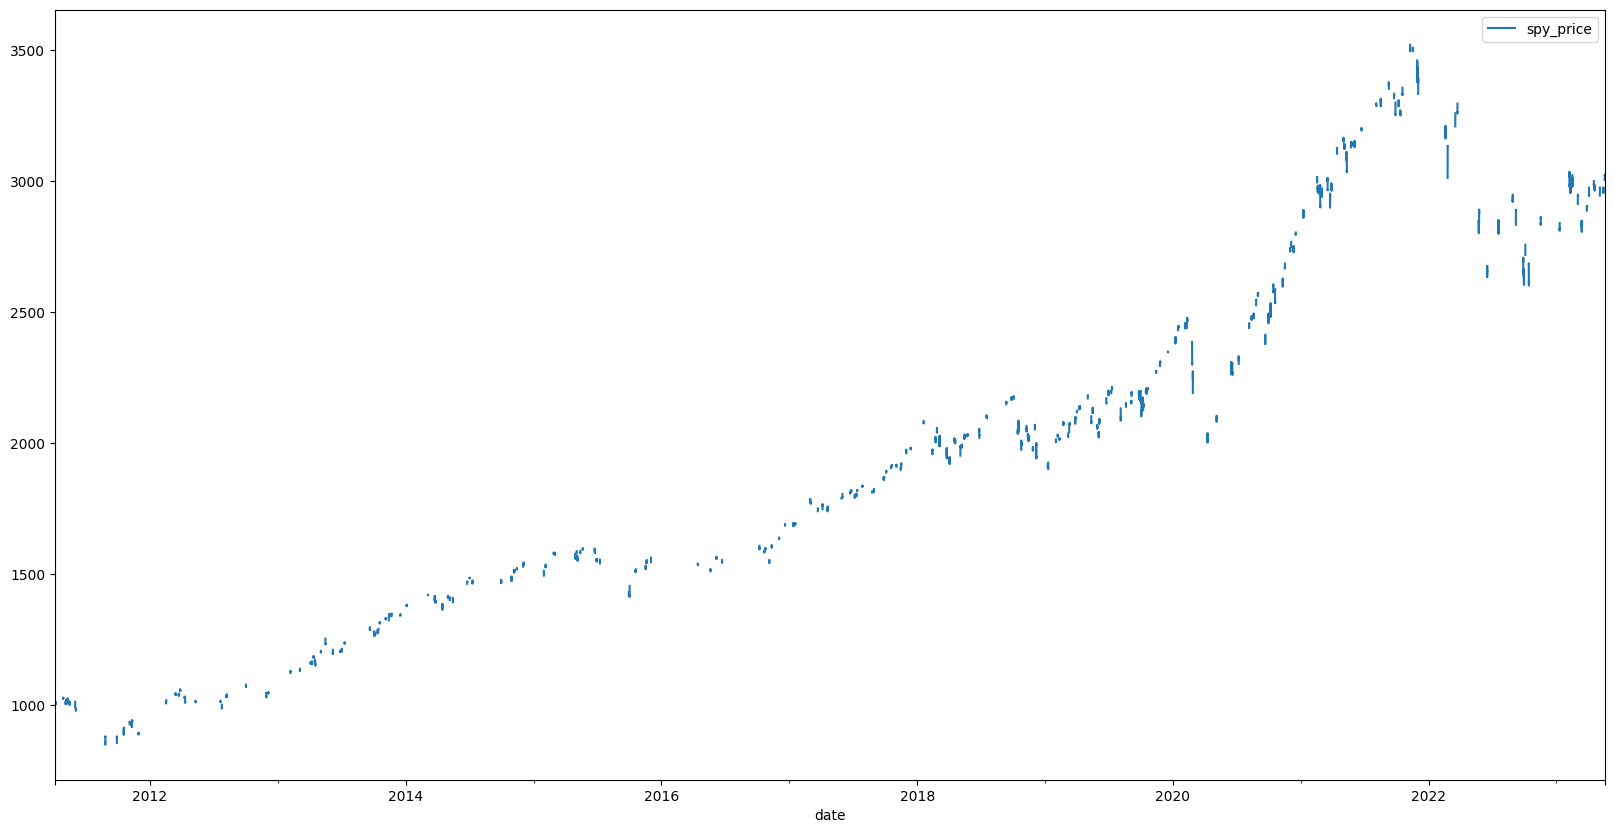

In [ ]:
spy_pos.plot(x='date', y='spy_price', figsize=(20,10))

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

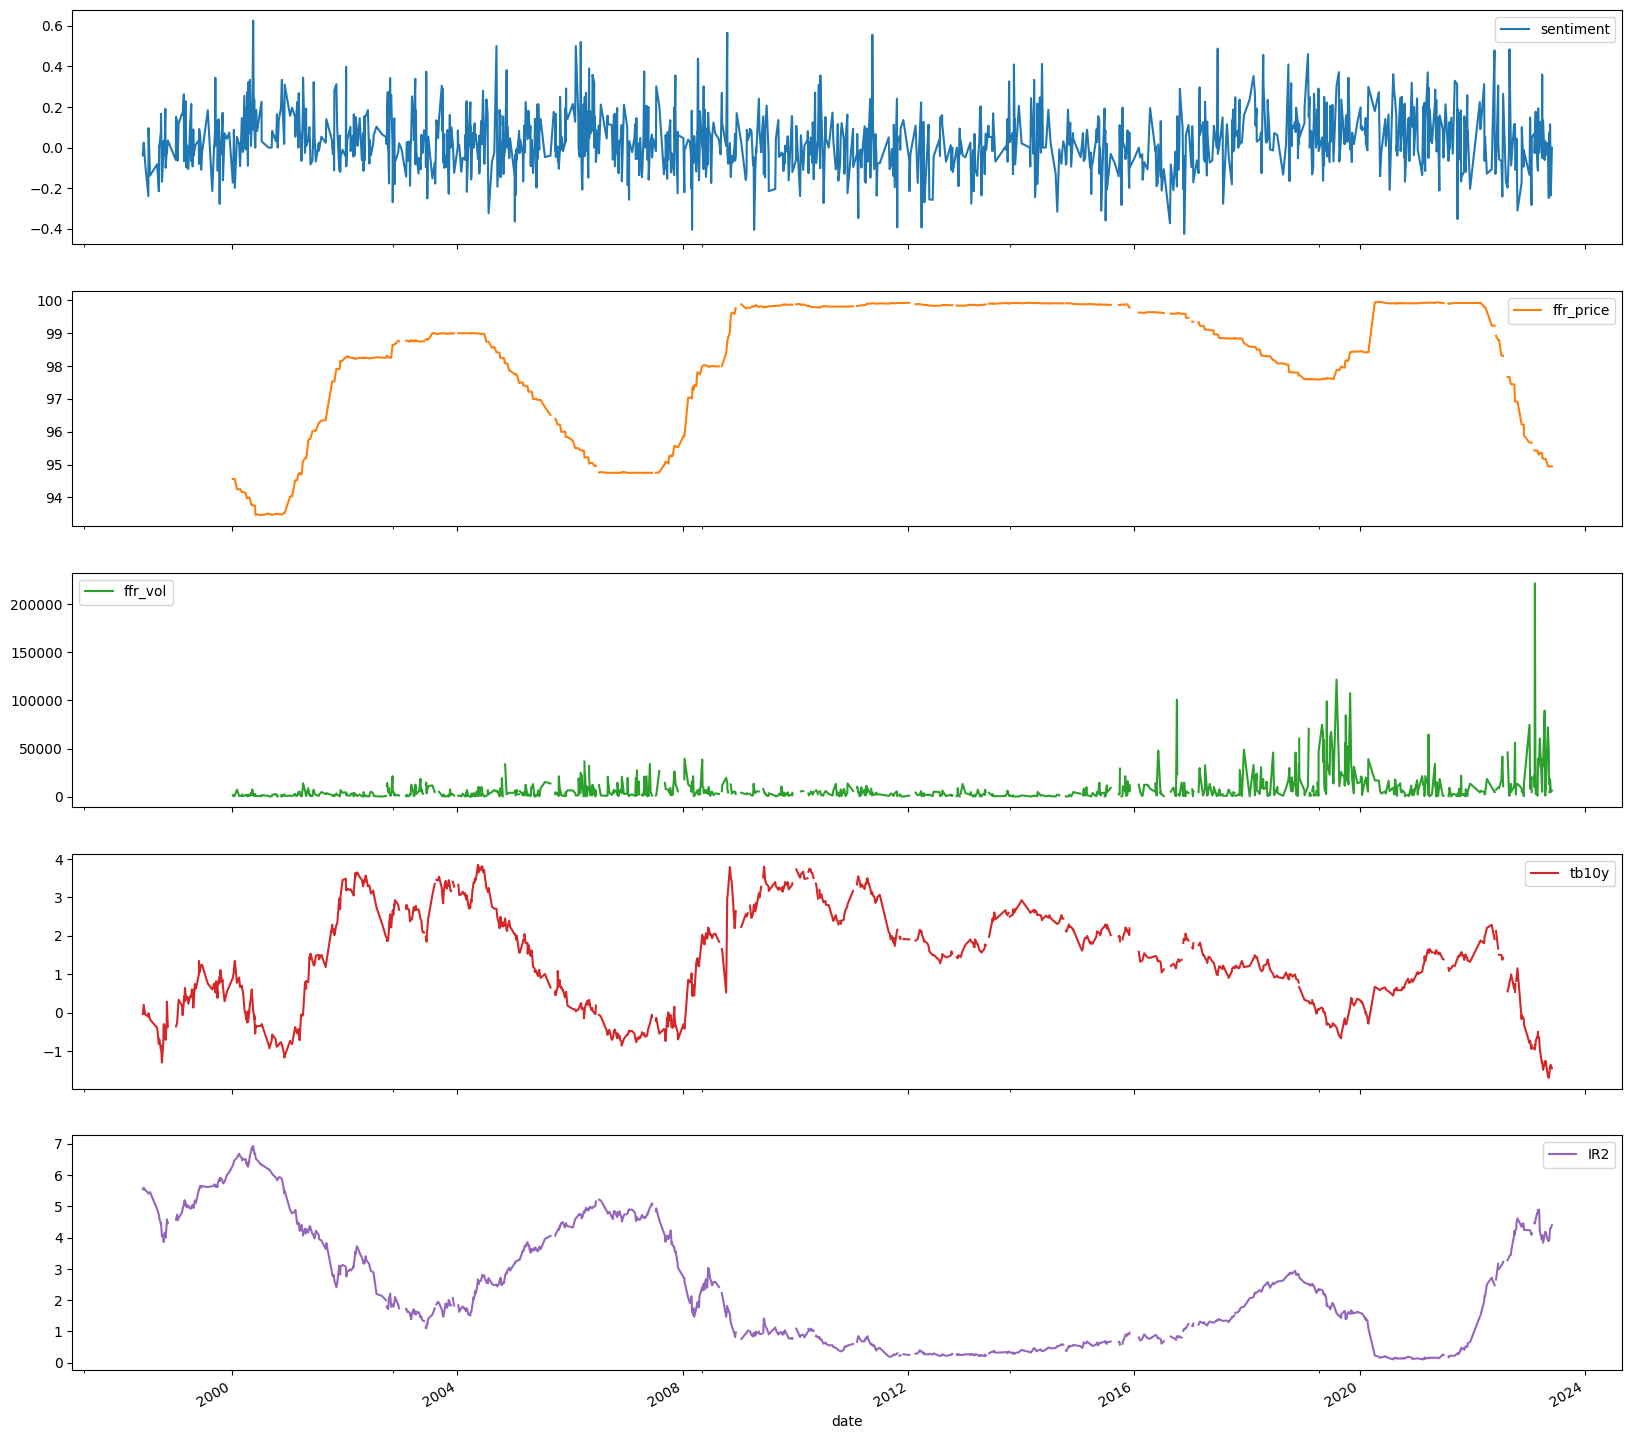

In [ ]:
#Graph df1 with x = date and y = all other columns
df1.plot(x='date', y=['sentiment', 'ffr_price', 'ffr_vol', 'tb10y', 'IR2'], subplots=True, figsize=(20, 20))